In [1]:
#import block
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

%matplotlib inline

In [2]:
#thres = 0.45 # Threshold to detect object

classNames = []
classFile = "Object_Detection_Files/coco.names"
with open(classFile,"rt") as f:
    classNames = f.read().rstrip("\n").split("\n")

configPath = "Object_Detection_Files/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
weightsPath = "Object_Detection_Files/frozen_inference_graph.pb"

net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)


def getObjects(img, thres, nms, draw=True, objects=[]):
    classIds, confs, bbox = net.detect(img,confThreshold=thres,nmsThreshold=nms)
    #print(classIds,bbox)
    if len(objects) == 0: objects = classNames
    objectInfo =[]
    if len(classIds) != 0:
        for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
            className = classNames[classId - 1]
            if className in objects:
                objectInfo.append([box,className])
                if (draw):
                    cv2.rectangle(img,box,color=(0,255,0),thickness=2)
                    #cv2.putText(img,classNames[classId-1].upper(),(box[0]+10,box[1]+30),
                    #cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
                    cv2.putText(img,str(round(confidence*100,2)),(box[0]+10,box[1]-30),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

    return img,objectInfo

(270, 480)


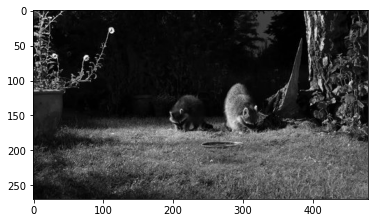

In [3]:
img = cv2.imread('data/Testpictures/raccoonsInGarden.jpg', cv2.IMREAD_GRAYSCALE)
def imshow(im):
    h,w = im.shape[:2]
    print(im.shape)
    plt.imshow(im,cmap='gray')
    plt.show()

imshow(img)

In [4]:
def test4dogs(name):
    img = cv2.imread(f'data/Testpictures/{name}.jpg')
    imshow(img)
    result, objectInfo = getObjects(img,0.30,0.2, objects=["dog"])
    #print(objectInfo)
    imshow(img)
    cv2.imwrite(f'data/Testpictures/{name}Output.jpg', img)

(556, 833, 3)


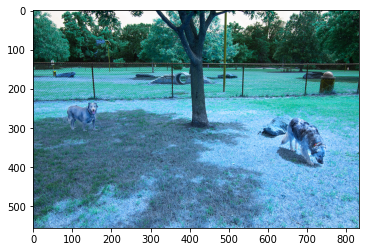

(556, 833, 3)


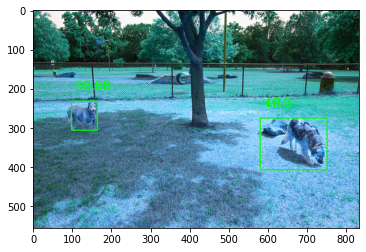

In [5]:
test4dogs("Dogpark3")

(191, 264, 3)


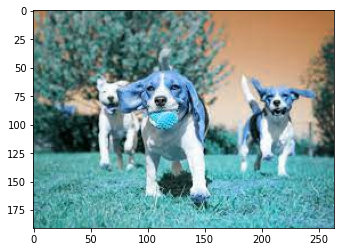

(191, 264, 3)


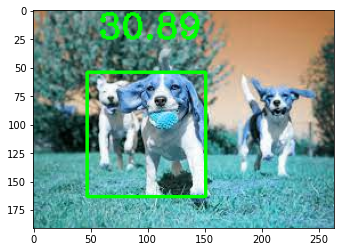

In [6]:
test4dogs("Dogpark2")